<a href="https://colab.research.google.com/github/joydeep03564/Machine_Learning-/blob/master/FakeJob_or_realJob_Posting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Problem Defination: Fake job or Real job Prediction**

According to the recent "economictimes" article,cited two Bangalorian as victims of the Fake Job Racket.It is now a common news.
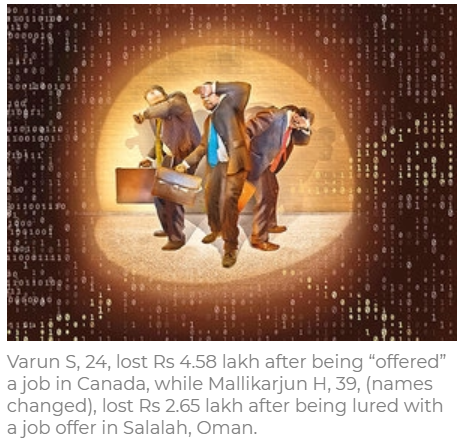

Source:https://economictimes.indiatimes.com/news/politics-and-nation/2-lose-rs-7-lakh-in-job-fraud-that-promised-plum-postings-abroad/articleshow/67622055.cms



The burgeoing fake job rackets are alarming. During this unprecidented times, when the world is suffering through a covid19 Pandamic and the economies seeing a negetive growth with increase in employement,fake job rackets are extreamly dangeour. Accoding to the weforum.org, in the week  of 25 April,2020 3.8 million Americans made an unemployment claim.
During this time when people are desperate to get a job, it is very easy for these rackets to tap people. One of the most efficient solution to this problem will be to idetify the fake jobs and remove them or report them.  
Through machine learning the classfying fakejobs is possible.Below step by step explaination is given:



#  



**About the dateset: **This dataset contains 18K job descriptions out of which about 800 are fake. The data consists of both textual information and meta-information about the jobs. The dataset can be used to create classification models which can learn the job descriptions which are fraudulent. 
The date set is taken from Kaggle:
 **DataSet:**https://www.kaggle.com/shivamreal-or-fake-fake-jobposting-prediction

**Objective:** **The objective is to design a classification system which can classify fake jobs and reals jobs with a decent precission.




**Business Constraints:** 

*   Misclassification should be minimum
*   Latency of the system is not major concern




Technical Project Description: Below are the breif of the steps which are followed in this perticular problem.


*   **Data Collection:**  Taken the data from Kaggle
*   **DataClearning:** There is a saying GIGO-'Garbage in Garbage out'.That  means the o/p of a computer pogram depends on the input data(Source: Wikipidea). In order for our system to work well, we need to clear our data,remove unessary data and duplicate data. We perform those activity in this step.
*   **Exploratory Analysis:** Anlysis of the feature to understand the data set
*   **Text Processing:** Performed text pre-processing and vetorised all text data
*   **Model Implementation:** Machine learning algorithim implentation  
*   **Performance Measurement :** Analysis of the performance of the model.







Loading the dataset: Here using google colab and mounted the drive through the following code below:

In [ ]:
# Cell1:Loading the dataset into google drive:
from google.colab import drive 
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Cell:2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize,word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import roc_auc_score

# Loading the dataset from google drive using pandas's dataframe

data=pd.read_csv("/content/drive/My Drive/Fakejobposting_classification/fake_job_postings.csv")




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


The dataframe is stored into a variable called data.

In [ ]:
#cell:3
data.shape

(17880, 18)

Loading and understanding the shape of the data:
By using read_csv, we have loaded the data. The data is stored as dataframe.

By using data.shape, we understand that the shape of the data is 17880X18.
we have 17880 data points and 18 features.





**Understanding the dataset**
We need to understand what the fatures available for our problem. Using pandasdataframe.columns, extracting feature names from the dataframe.


In [ ]:
#cell:4
data.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

**We have the following features:**
'job_id', 'title', 'location', 'department', 'salary_range',
'company_profile', 'description', 'requirements', 'benefits','telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'industry', 'function',      'fraudulent'


**Using head() visiualising the dataset** 

In [ ]:
# cell5
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


**Feature Selection**:
After seeing the features, we understood that there are couple of features which can be droped as they are not going to help us in solving our final objective.
Below are few features which is droped after first data visuilization:
1.'job_id'
2.'salary_range'
3.'benefits',
4.'telecommuting',
5.'has_questions'

We are reducing the number of dimentions for our data set. As we know from curse of dimentionality and hughes phenomenon(https://en.wikipedia.org/wiki/Machine_learning), the lesser the dimentions are, the better the machine learning models performs.


In [ ]:
#cell8
# Droping some of irrelevent features Job-id,Salary_range,benefits,telecommuting:

df=data.drop(columns=['job_id','salary_range','benefits','telecommuting','has_questions'])
df.shape


(17880, 13)

After doping the above mentioned features, the final data set is of 13 dimention.

**Understanding the class labels:** The Feature with "Fraudulent "name is our class variable or target variable.

In [ ]:
# cell;6
label=data['fraudulent']
label.value_counts()


0    17014
1      866
Name: fraudulent, dtype: int64

We have taken the class level into a variable called label. We found that out of 17880 data points, we have 866 data points as Fraud. 
From these, we can easily identify that the data set is highly imbalanced.

In [ ]:
#Cell7
print(f"The percentage of Fraudulent jobs is {866/17880*100}")

The percentage of Fraudulent jobs is 4.8434004474272925


Considering our dataset, 4.843% percentage of the jobs are fraudulent.

In [ ]:
#cell9
df.head()

,title,location,department,company_profile,description,requirements,has_company_logo,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,1,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,1,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,1,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",1,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


**DataClearning:**
After intuitive analysis, we have removed couple of features. We will also reduce the dimensions further after doing univariat analysis.

1. **Indentifying NAN Values/Null Values**

In [ ]:
# Null values counts
#10
df.isnull().sum()


title                      0
location                 346
department             11547
company_profile         3308
description                1
requirements            2695
has_company_logo           0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

From the NAN values, it is evident there are couple of features which has a very high Missing values. Instead of using imputations,we can remove those features. 
here we are going to remove department,required_experience,required_education,functions and industry

Droping columns with high NAN values after juding their importance on the final out comes of the problem.

In [ ]:
data=df.drop(columns=[ 'department', 
       'requirements', 'employment_type',
       'required_experience', 'required_education','function',
       ])

In [ ]:
#cell 13
data.shape

(17880, 7)

The dimention of the dataset is now 17880X7.

In [ ]:
data.isna().sum()

title                  0
location             346
company_profile     3308
description            1
has_company_logo       0
industry            4903
fraudulent             0
dtype: int64

We have still missing values. But throwing away features is always not a good idea.Instead of droping those features, 
we are going to impute those missing values as follows. Some times missing values can be good peace of information. We
wil impute the features as follows:
**Location** - as Unknow
**Company_profile**- notprovided
**industry**-Not given
**description**-''(Blank space)

In [ ]:
#cell:14
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.fillna.html

values={'location':'unknown','company_profile': 'notprovided','industry': 'notgiven','description':''  }
imputed_data=data.fillna(value=values)




In [ ]:
#cell:15
imputed_data.isna().sum()


title               0
location            0
company_profile     0
description         0
has_company_logo    0
industry            0
fraudulent          0
dtype: int64

After all data cleaning, now we have zero NAN in our dataset.

After again going through each features, found that the 'location' feature has the values in this format: "US, NY, New York". 
For our problem may be country is the important feature to analyse, hence removing the State and City name.

In [ ]:
#cell 15
# this function will parse the text and keep the first word.
# will convert the Country, State,city datas to only Country names.
def country(text):
  list1=text.split(',')
  x=list1[0]
  #print(type(x))
  return x

imputed_data['location']=imputed_data['location'].map(country)


Converted location feature into only Country. This will help us to do further analysis of the data.

Find Unique values in a dataset: The more unique values causes more skewed distribution.
As title has very skewed distribution, we are going to drop that feature also.

In [ ]:
#cell:16
imputed_data.nunique()

title               11231
location               91
company_profile      1710
description         14802
has_company_logo        2
industry              132
fraudulent              2
dtype: int64

**2. Droping the duplicates: **

In [ ]:
# Finding Duplicates and Removing it
#cell:17
final_dataset=imputed_data.drop_duplicates()
final_dataset.shape

(16001, 7)

**Dataset after removing the duplicates:**

In [ ]:
#cell:18
# 1 represents = Fake posting 
# 0 represents= authentic post
final_dataset['fraudulent'].value_counts()

0    15280
1      721
Name: fraudulent, dtype: int64

In [ ]:
class_label=final_dataset['fraudulent']

After, we data cleaning we got 16001 data points with 7 features.

In [ ]:
#Cell:19
# percentage of Jobs are Fradulent:
print(f"The Percentage of Jobs are Fraudelent is {(721/16001)*100}")


The Percentage of Jobs are Fraudelent is 4.505968376976439


The percentage is 4.5%. Hence the data is severely imbalanced 

**Exploratory Data Analysis:**




Number of locations : 91


<BarContainer object of 91 artists>

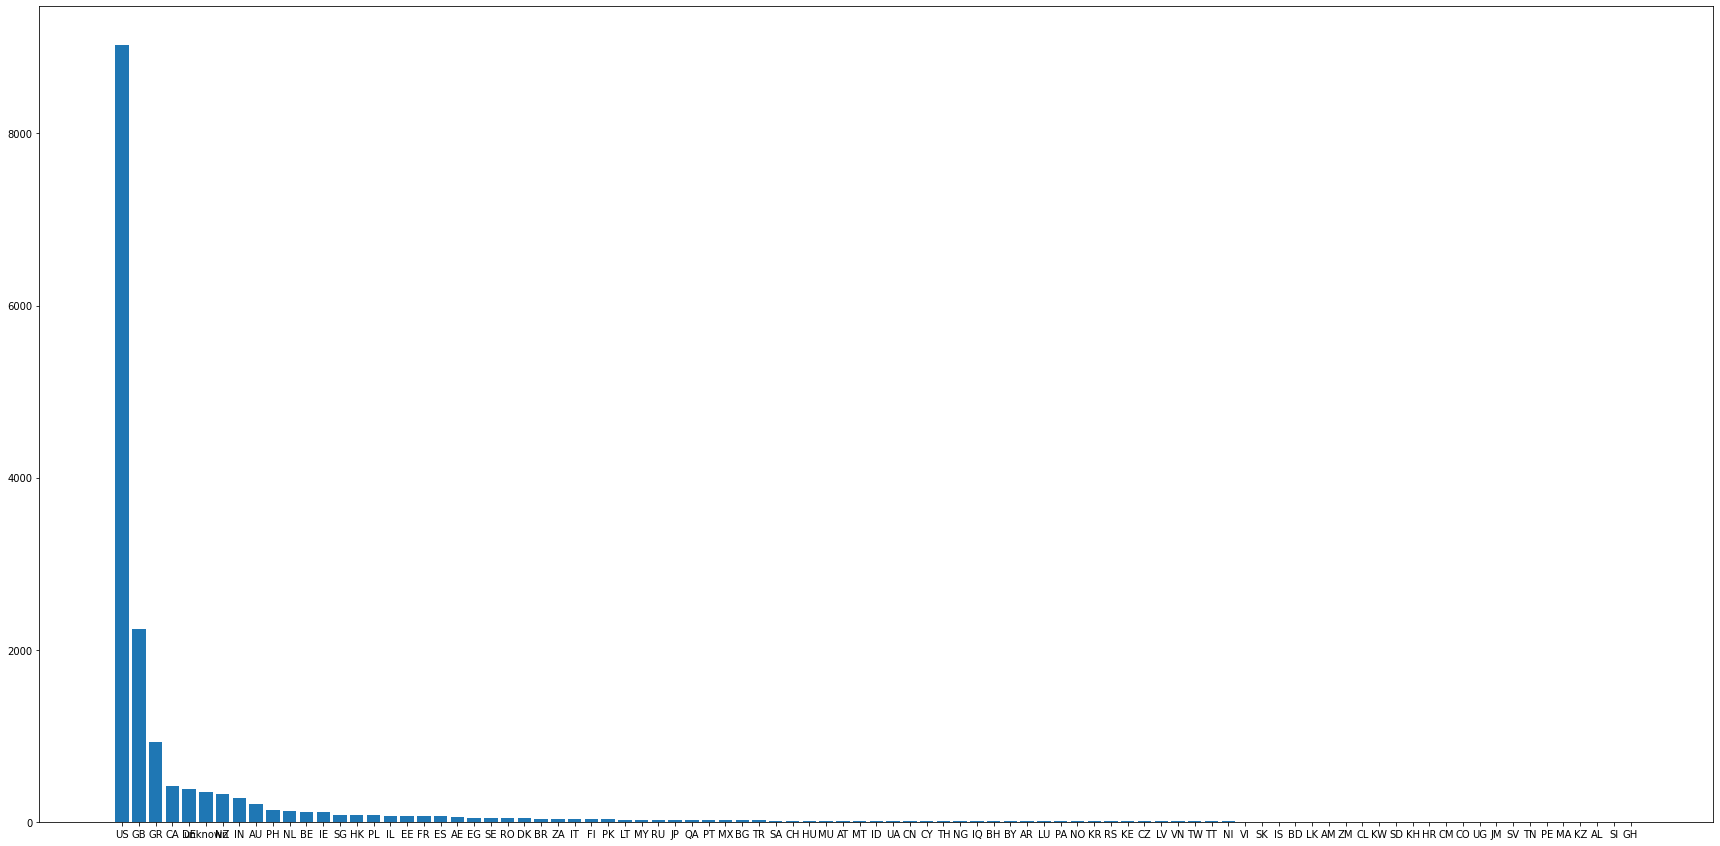

In [ ]:
#20
# Ploting few graphs to see how features are important 
# Please clarify shape[0]
country_counts=final_dataset['location'].value_counts()
print('Number of locations :', country_counts.shape[0])
keys=country_counts.keys()
#print(keys)
value=country_counts.values
#print(value)
plt.figure(figsize=(30,15))
plt.bar(keys,value)



**Univariate analysis of Location:** Ploting the histograms 

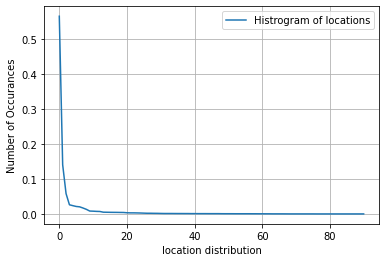

In [ ]:
#Ploting the histogram
#cell:21
s=sum(country_counts.values)
h=country_counts.values/s
plt.plot(h, label="Histrogram of locations") # How to Draw a histogram with Frequency bars?
plt.xlabel('location distribution')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

US has highest number of the data point.We can can figure out much from the location. As US has most of the data points, so most likely the classifier will work better on the USA data. 
Infact the location feature is highly skewed. So Location may not be a good cadidate for further anlysis.

**Univariate analysis of Has_Logo feature:**

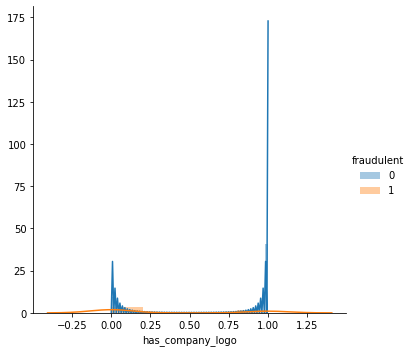

In [ ]:
sns.FacetGrid(final_dataset, hue="fraudulent",height=5) \
   .map(sns.distplot, "has_company_logo") \
   .add_legend();
plt.show();

We could not make out much from the distribution plot of has_company_logo feature.We can say companies which has no logo has shown slighly higher peak of fraudulent jobs than the companies which has logo.In this case, we will keep this feature.

In [ ]:
# Droping the location 
final_dataset.drop(columns='location')

,title,company_profile,description,has_company_logo,industry,fraudulent
0,Marketing Intern,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",1,notgiven,0
1,Customer Service - Cloud Video Production,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,1,Marketing and Advertising,0
2,Commissioning Machinery Assistant (CMA),Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",1,notgiven,0
3,Account Executive - Washington DC,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,1,Computer Software,0
4,Bill Review Manager,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,1,Hospital & Health Care,0
...,...,...,...,...,...,...
17874,JavaScript Developer,notprovided,"Sr, JavaScript Developer Experience : 4-10 yea...",0,Computer Software,0
17875,Account Director - Distribution,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,1,Computer Software,0
17876,Payroll Accountant,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,1,Internet,0
17877,Project Cost Control Staff Engineer - Cost Con...,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,0,notgiven,0


In [ ]:
final_dataset.nunique()

title               11231
location               91
company_profile      1710
description         14802
has_company_logo        2
industry              132
fraudulent              2
dtype: int64

By analysis the final data set, we found that title also has 11231 unique values.
Finally we will remove the following features also. 

In [ ]:
data=final_dataset.drop(columns=['title','location','industry'])

**Feature Selection**: 
After exploratory analysis, we are left with 3 features. 2 text features i.e(Company_profile,description) and has_company_logo numerical feature.
The class lebel is "fraudulent"


In [ ]:
data.head(10)

,company_profile,description,has_company_logo,fraudulent
0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",1,0
1,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,1,0
2,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",1,0
3,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,1,0
4,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,1,0
5,notprovided,Job OverviewApex is an environmental consultin...,0,0
6,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,1,0
7,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,1,0
8,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,1,0
9,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,1,0


**Features data and Class label split:**
The feature data will be renamed as x
The class label will be renamed as y.

In [ ]:
# Taken the data set into the variable x
x=data.iloc[:,:3]
#print(type(x))
x.head()

,company_profile,description,has_company_logo
0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",1
1,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,1
2,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",1
3,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,1
4,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,1


In [ ]:
y=data.iloc[:,3]
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
17874    0
17875    0
17876    0
17877    0
17878    0
Name: fraudulent, Length: 16001, dtype: int64


**TEXT PROCESSING**

Below are the steps for Text processing:
1. Check for HTML tag
2. Remove -.*/ all other symbols 
3. Research shows that there is no adjectives in 2 Letter-We will check and remove words for length less than 2
4. Covert all words to lowercase
5. Remove stopwords
6. Poters stemming 



Before performing,any analysis, printing arbitary text from the company profile date set.

In [ ]:
# Printing some random company profile: To check the sample data. This will help us to design our Text processing functions
print_0=x.company_profile.values[0]
print_1=x.company_profile.values[1]
print_10=x.company_profile.values[10]
print(print_0)
print("*"*30)
print(print_10)
print("*"*30)
print_100=x.company_profile.values[100]
print(print_100)
print("*"*30)
print_1500=x.company_profile.values[1500]
print("*"*30)
print_3500=x.company_profile.values[3500]
print(print_3500)
print(print_0)
print_15000=x.company_profile.values[15000]
print("*"*30)
print(print_15000)


We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City.
******************************
notprovided
******************************
GetCloudServices is a privately held tec

**Text processing function**:

We will first substitute all contracted forms into expanded form.

*   We will first substitute all contracted forms into expanded form.
*   Removing tags 
*   Removing Urls
*   Removing lxml tags 
*   Removing words with numbers








In [ ]:
# Function to decontract the contracted forms of the text:

import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
decontracted(print_0)

'We are Food52, and we have created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We are focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We are located in Chelsea, in New York City.'

In [ ]:
decontracted(print_15000)

'A Creative agency for Web Design &amp; Development, Software Development and Mobile Application Development. We offering a vast array of solutions on varied platforms. Our aim is to amalgamate the best in technology, design and usability in presenting solutions that best suit your requirements. Therefore, we invest in our mind resources in order to gain success which is lifetime in means of assets and building our basics stronger. We provide market competitive salaries, outstanding benefits &amp; fringe facilities to the right candidates.'

In [ ]:
decontracted(print_3500)

'Seamless software production. Enterprise grade.Our company was founded in 2014, but our story started eight years earlier. Over the years we have been fortunate to build a number of custom-tailored software production solutions for our customers, including some of the world is largest companies. We have learned enterprises have transformed the software delivery processes, but the tools lag behind: fragmented, hard to maintain and unpleasant to use. To bring our vision for the software delivery experience, we have created Deveo. With our powerful, integrated and easy to use platform our mission is to make enterprise software production seamless.'

Using Regular Expressio and few functions, we are cleaning and pre-processing the text data.

In [ ]:
#Removing all tags from https://stackoverflow.com/questions/16206380/python-beautifulsoup-how-to-remove-all-tags-from-an-element
from bs4 import BeautifulSoup
soup=BeautifulSoup(print_1,'lxml')
text=soup.get_text()
print(text)

90 Seconds, the worlds Cloud Video Production Service.90 Seconds is the worlds Cloud Video Production Service enabling brands and agencies to get high quality online video content shot and produced anywhere in the world. 90 Seconds makes video production fast, affordable, and all managed seamlessly in the cloud from purchase to publish. http://90#URL_fbe6559afac620a3cd2c22281f7b8d0eef56a73e3d9a311e2f1ca13d081dd630#90 Seconds removes the hassle, cost, risk and speed issues of working with regular video production companies by managing every aspect of video projects in a beautiful online experience. With a growing global network of over 2,000 rated video professionals in over 50 countries managed by dedicated production success teams in 5 countries, 90 Seconds provides a 100% success guarantee.90 Seconds has produced almost 4,000 videos in over 30 Countries for over 500 Global brands including some of the worlds largest including Paypal, L’Oreal, Sony and Barclays and has offices in Auck

In [ ]:
# Removing urls from the text : 
import re
def remove_urls (vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)
remove_urls(print_1)


'90 Seconds, the worlds Cloud Video Production Service.90 Seconds is the worlds Cloud Video Production Service enabling brands and agencies to get high quality online video content shot and produced anywhere in the world. 90 Seconds makes video production fast, affordable, and all managed seamlessly in the cloud from purchase to publish. #URL_fbe6559afac620a3cd2c22281f7b8d0eef56a73e3d9a311e2f1ca13d081dd630#90 Seconds removes the hassle, cost, risk and speed issues of working with regular video production companies by managing every aspect of video projects in a beautiful online experience. With a growing global network of over 2,000 rated video professionals in over 50 countries managed by dedicated production success teams in 5 countries, 90 Seconds provides a 100% success guarantee.90 Seconds has produced almost 4,000 videos in over 30 Countries for over 500 Global brands including some of the worlds largest including Paypal, L’Oreal, Sony and Barclays and has offices in Auckland, Lo

In [ ]:
# remove urls from text python: https://stackoverflow.com/a/40823105/4084039
print_1 = re.sub(r"http\S+", "", print_1)

print(print_1)

90 Seconds, the worlds Cloud Video Production Service.90 Seconds is the worlds Cloud Video Production Service enabling brands and agencies to get high quality online video content shot and produced anywhere in the world. 90 Seconds makes video production fast, affordable, and all managed seamlessly in the cloud from purchase to publish.  Seconds removes the hassle, cost, risk and speed issues of working with regular video production companies by managing every aspect of video projects in a beautiful online experience. With a growing global network of over 2,000 rated video professionals in over 50 countries managed by dedicated production success teams in 5 countries, 90 Seconds provides a 100% success guarantee.90 Seconds has produced almost 4,000 videos in over 30 Countries for over 500 Global brands including some of the worlds largest including Paypal, L’Oreal, Sony and Barclays and has offices in Auckland, London, Sydney, Tokyo and Singapore. |  |  


In [ ]:
#remove words with numbers in python: https://stackoverflow.com/a/18082370/4084039
print_1=re.sub("\S*\d\S*", "", print_1).strip()
print(print_1)


Seconds, the worlds Cloud Video Production  Seconds is the worlds Cloud Video Production Service enabling brands and agencies to get high quality online video content shot and produced anywhere in the world.  Seconds makes video production fast, affordable, and all managed seamlessly in the cloud from purchase to publish.  Seconds removes the hassle, cost, risk and speed issues of working with regular video production companies by managing every aspect of video projects in a beautiful online experience. With a growing global network of over  rated video professionals in over  countries managed by dedicated production success teams in  countries,  Seconds provides a  success  Seconds has produced almost  videos in over  Countries for over  Global brands including some of the worlds largest including Paypal, L’Oreal, Sony and Barclays and has offices in Auckland, London, Sydney, Tokyo and Singapore. |  |


In [ ]:
# English Stop word list 

stopwords= set([ 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

Created the Stopwords dictionary of the english.

**Pre-processing the text features:**
First, we have taken the Company profile feature and pre-processing using the above mention methods, regex and customed written functions.
Below we are combining all the functions and regular expressions to pre-process our company_profile feature.


In [ ]:
# Combining all the preprocessing steps in one
preprocessed_company_profile=[]
for sentence in x['company_profile'].values:
  sentence=decontracted(sentence) # expanding the text
  sentence=re.sub(r"http\S+", " ", sentence) # Removing the url
  sentence=remove_urls(sentence)
  sentence = BeautifulSoup(sentence,'lxml').get_text()
  sentence=re.sub('[^A-Za-z0-9]+', ' ', sentence) 
  #sentence=re.sub(r"http\S+", " ", sentence)
  sentence= re.sub("\S*\d\S*", "", sentence).strip()
  #sentence = BeautifulSoup(sentence,'lxml').get_text()
  sentence=' '.join(e.lower() for e in sentence.split() if e.lower() not in stopwords)
  #print(sentence)
  preprocessed_company_profile.append(sentence.strip())

In [ ]:
preprocessed_company_profile[8]

'woman owned small business whose focus service management using best breed technology implementing industry best practices following itil framework work extensively areas planning design architecting assessing implementing training technology solutions focus areas include enterprise network systems management architecture implementation service management including service desk associated process definitions incident problem management change configuration management service level management configuration management database cmdb asset management alert event management focus best breed technology follow industry best practices including itil strong focus training knowledge transfer associated solutions many resources course developers instructors many vendor partners practitioner experience comes training environment us strong set core values based biblical principles include great integrity high ethics always striving excellence always seeking candidates want work amazing technology 

In [ ]:
preprocessed_company_profile[4]

'spotsource solutions llc global human capital management consulting firm headquartered miami florida founded january spotsource created fusion innovative service offerings meet increasing demand today economy specialize talent acquisition staffing executive search services across various functions specific industries global talent transfusion gtt services utilize best practice qualification standards deliver talent temporary temporary hire permanent basis health career transition hct subsidiary global talent transfusion offers placement services specifically growing healthcare arena spotsource executive search ses consultants special breed talent evangelists understand advise streamline human resources process direction organization requires long term sustainability success succession planning leadership development programs compensation analysis recruitment process outsourcing customized best suit needs business understand demand cost effective solutions organization seeking potentia

In [ ]:
preprocessed_company_profile[15000]

'creative agency web design development software development mobile application development offering vast array solutions varied platforms aim amalgamate best technology design usability presenting solutions best suit requirements therefore invest mind resources order gain success lifetime means assets building basics stronger provide market competitive salaries outstanding benefits fringe facilities right candidates'

**Now we have to do the same for description feature:**

In [ ]:
print_descri_0=x.description.values[0]
print(print_descri_0)
print("*"*30)
print_descri_11=x.description.values[11]
print(print_descri_11)
print("*"*30)
print_descri_100=x.description.values[100]
print(print_descri_100)
print("*"*30)

Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and curated recipe hub, is currently interviewing full- and part-time unpaid interns to work in a small team of editors, executives, and developers in its New York City headquarters.Reproducing and/or repackaging existing Food52 content for a number of partner sites, such as Huffington Post, Yahoo, Buzzfeed, and more in their various content management systemsResearching blogs and websites for the Provisions by Food52 Affiliate ProgramAssisting in day-to-day affiliate program support, such as screening affiliates and assisting in any affiliate inquiriesSupporting with PR &amp; Events when neededHelping with office administrative work, such as filing, mailing, and preparing for meetingsWorking with developers to document bugs and suggest improvements to the siteSupporting the marketing and executive staff
******************************
TransferWise is the clever new way to move money between countr

In [ ]:
# Applying all regex and custome functions to pre-process the describe feature

preprocessed_job_describe=[]
for sentence in x['description'].values:
  sentence=decontracted(sentence) # expanding the text
  sentence=re.sub(r"http\S+", " ", sentence) # Removing the url
  sentence=remove_urls(sentence)
  sentence = BeautifulSoup(sentence,'lxml').get_text()
  sentence=re.sub('[^A-Za-z0-9]+', ' ', sentence) 
  #sentence=re.sub(r"http\S+", " ", sentence)
  sentence= re.sub("\S*\d\S*", "", sentence).strip()
  #sentence = BeautifulSoup(sentence,'lxml').get_text()
  sentence=' '.join(e.lower() for e in sentence.split() if e.lower() not in stopwords)
  #print(sentence)
  preprocessed_job_describe.append(sentence.strip())

In [ ]:
preprocessed_job_describe[1]

'organised focused vibrant awesome passion customer service slick typing skills maybe account management think administration cooler polar bear jetski need hear cloud video production service opperating glodal level yeah pretty cool serious delivering world class product excellent customer service rapidly expanding business looking talented project manager manage successful delivery video projects manage client communications drive production process work coolest brands planet learn global team representing nz huge way entering next growth stage business growing quickly internationally therefore position bursting opportunity right person entering business right time seconds worlds cloud video production service seconds worlds cloud video production service enabling brands agencies get high quality online video content shot produced anywhere world fast affordable managed seamlessly cloud purchase publish seconds removes hassle cost risk speed issues working regular video production comp

In [ ]:
preprocessed_job_describe[15000]

'logo designer responsible design creative logo requirements valuable clients designer design deliver logos enhancements defect resolution required ongoing basis best practices design methods utilized insure success projects designer ability create logo requirements stage design design deployment required experience graphics logo sketching creativity flexibility adaptability ability learn quickly various creative environments delivering quality work tight deadlines key attributes individual'

**Steming:**
We will use porters stemming to stem the features. Steming is a technique to reduce the inflected word to its root form. 
We can use lemmatizers also which keeps the meaning intact. But in this we will be using porters stemmer.

In [ ]:
# Applying Porters stemmer on the job_description feature:
import nltk
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize,word_tokenize

stemed_preprocessed_job_describe=[]

for sentence in preprocessed_job_describe:
  word_list=word_tokenize(sentence) #Tokenize the sentence 
  ps=PorterStemmer()
  stemword_list=[]
  for word in word_list:
    stem_word=ps.stem(word)
    stemword_list.append(''.join(stem_word))
  stemed_preprocessed_job_describe.append(' '.join(stemword_list))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Sample of the Stemmed text Features 
print(stemed_preprocessed_job_describe[1])

organis focus vibrant awesom passion custom servic slick type skill mayb account manag think administr cooler polar bear jetski need hear cloud video product servic opper glodal level yeah pretti cool seriou deliv world class product excel custom servic rapidli expand busi look talent project manag manag success deliveri video project manag client commun drive product process work coolest brand planet learn global team repres nz huge way enter next growth stage busi grow quickli intern therefor posit burst opportun right person enter busi right time second world cloud video product servic second world cloud video product servic enabl brand agenc get high qualiti onlin video content shot produc anywher world fast afford manag seamlessli cloud purchas publish second remov hassl cost risk speed issu work regular video product compani manag everi aspect video project beauti onlin experi grow network rate video profession countri dedic product success team countri guarante video project suc

In [ ]:
#Sample of the stemmed text feature
print(stemed_preprocessed_job_describe[14600])

job open websit relev job feel free search websit appli directli click appli redirect main websit search jobsfood qualiti job descriptioncandid must degre food technolog food scienc qualiti control nutrit food servic manag relat minimum experi two yearseduc b tech b e categori job qualiti test process controlvisit url url


**Stemming the Company_profile feature**

In [ ]:
# Applying Porter stemmer to the preprocessed_company_profile
import nltk
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize,word_tokenize

stem_preprocessed_company_profile=[]


for sentence in preprocessed_company_profile:
  word_list=word_tokenize(sentence)
  ps=PorterStemmer()
  stemword_list=[]
  for word in word_list:
    stem_word=ps.stem(word)
    stemword_list.append(''.join(stem_word))
  stem_preprocessed_company_profile.append(' '.join(stemword_list))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
stem_preprocessed_company_profile[10500]

'aptitud staf solut redesign recruit wheel innov new platform cut recruit time half yield scientif proven result client candid enjoy pleasant experi advanc simpl use technolog tenur industri experienc recruit team join us fresh new experi leverag career way repres candid enjoy follow perk expert negoti maxim total compens packag sign bonu aptitud staf addit client sign bonu applic year access anyperkreloc servic town candidatescontinu educ area profess seminar workshop skill develop event contract employe receiv quarterli bonus durat project direct hire employe receiv doubl bonu per refer recruit candid newli appoint companyal candid encourag particip referr bonu program earn per hire referr'

**The text features are pre-processed and the next logical step is to convert them into Vectors:**

Going to use the following techniques:
1. Bag of words 
2. Term-frequency-Inverted_Term-Frequency(TFIDF)


Featurerising:**BOW:** : Converting the stemmed text features into vectors using BOW.



We have already Stemmed the data. We will first build our random forest model on the Stemed data. But Before we give our Stemed pre processed text into model, We need to convert it to vector. We will use uninary,bi-gram-Bag of words and TFIDF for converting our text feature into vector.

In [ ]:
#Implementing BOW: Here, we are using max feature as 2500 and we will use only 1500 most ocurring words to create the bag of words feature vector.
#min_df: That means a word should appear in at least 5 times
#max_df: That means use those words which occurs only in 70% of the documents 
from sklearn.feature_extraction.text import CountVectorizer

vector_count=CountVectorizer(max_features=2500,min_df=5,max_df=0.7)
final_company_profile=vector_count.fit_transform(stem_preprocessed_company_profile).toarray()
final_company_profile.shape



(16001, 2500)

In [ ]:
#Implementing TFIDF on the stemmed data of the company profile.
#min_df: That means a word should appear in at least 5 times
#max_df: That means use those words which occurs only in 70% of the documents 

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vector=TfidfVectorizer(max_features=2500,min_df=5,max_df=0.7)
final_company_profile_tfidf=tfidf_vector.fit_transform(stem_preprocessed_company_profile).toarray()
final_company_profile_tfidf.shape


(16001, 2500)

In [ ]:
f=final_company_profile_tfidf

**Training Individual Feature:**
**Using final tfidf of the company profile**

Test and train split: 
We are using training and test split from sklearn. Here we are taking 70% data for training and 30% data for test.
We are not using cross validation here in the first version.

In [ ]:
# Creating Models out of individual text features:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(f,y,test_size=0.3,random_state=0)



In [ ]:
#creating the model: We are using RandomForest Classifier to build the model. Using fit, we are training the model. 
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=1000,random_state=0)
classifier.fit(x_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

**Predicting the class labels with the test data:**

In [ ]:
# We are predicting the labels on the test data. 
y_predict=classifier.predict(x_test)

**Performance matrix of the model:**
Here we need to refer confusion matrix and classification reports for reference.
We cann't use accuracy here as yard stick as the dataset is highly imbalanced.

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))
print(accuracy_score(y_test,y_predict))

[[4592    1]
 [ 119   89]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      4593
           1       0.99      0.43      0.60       208

    accuracy                           0.98      4801
   macro avg       0.98      0.71      0.79      4801
weighted avg       0.98      0.98      0.97      4801

0.9750052072484899


In [ ]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test,y_predict))

0.7138334463816176


We saw that ROC is 71% percentage. Let us try impute some data to make the date more balanced.



 **Now taking the job description data:We will apply TFIDF using BOW with bi-grams.**

In [ ]:
# Creating BOW for job description:
# here we are taking by grams to make the vectorisation more meaning full.
from sklearn.feature_extraction.text import CountVectorizer
describe_vector=CountVectorizer(max_features=2500,ngram_range=(1,2),min_df=5,max_df=0.7)
final_vector_describe=describe_vector.fit_transform(stemed_preprocessed_job_describe)



**Converting the vectors using TFIDF:**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_jobdescribe_vector=TfidfVectorizer(ngram_range=(1, 1),max_features=2500,min_df=5,max_df=0.7)
final_vector_describe_TFIDF=tfidf_jobdescribe_vector.fit_transform(stemed_preprocessed_job_describe)
final_vector_describe_TFIDF.shape



(16001, 2500)

We will  use Random forest to both the 1.BOW vectorised bi-grams vector 
2. also will apply RF to Bi-gram vector

**Applying RF to BOW with bi-grams**





In [ ]:
# first we will apply the BOW bi-gram vector
x=final_vector_describe


Spiliting the train and test data here:

In [ ]:
# Spliting the train and test data into 70:30 split:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
# Implementing the random forest using the Sklearn:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=1000,random_state=0)
classifier.fit(x_train,y_train)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# Predicting on the x_test
y_predict=classifier.predict(x_test)

**Performance of the Models:**
 The performance of the model will based on the matrix like Confusion matrix,Precision,recall,F1 score and AUC ROC score.




In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))
#print(accuracy_score(y_test,y_predict))


[[4592    1]
 [ 122   86]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      4593
           1       0.99      0.41      0.58       208

    accuracy                           0.97      4801
   macro avg       0.98      0.71      0.78      4801
weighted avg       0.97      0.97      0.97      4801



In [ ]:
# Appling AUC ROC matrix for Further analysis as the dataset is imbalance:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_predict))


0.7066219079200791


Applying RF on TFIFD Vectorised:

In [ ]:
# Putting the dataset into a variable x
x=final_vector_describe_TFIDF

In [ ]:
#Spliting the dataset into 70:30 ratio
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
#Training the model using Random Forest 
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=1000,random_state=0)
classifier.fit(x_train,y_train)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# Predicted values by using x_test data
y_predict=classifier.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[4592    1]
 [ 119   89]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      4593
           1       0.99      0.43      0.60       208

    accuracy                           0.98      4801
   macro avg       0.98      0.71      0.79      4801
weighted avg       0.98      0.98      0.97      4801



In [ ]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_predict))

0.7138334463816176


**Scope for Further Improvement:**


1.   Trying lemmatization instead of steaming 
2.   Using Vectoriser like Word2Vec instead of TFIDF and BOW
3.   Using of based line model like Naive base, Logistic regression with Hyper-parameter tunning.
4.   Using ensembles techniques like gradient boosting.

